In [1]:
import librosa
import os
import glob
import soundfile
import soundfile as sf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
# from keras.utils import np_utils

In [2]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
import matplotlib.pyplot as plt
import itertools

import warnings 
warnings.filterwarnings('ignore')

In [3]:
# Define the scaler object
scaler = StandardScaler()

In [4]:
print(os.getcwd())

os.listdir()

C:\Users\asnp2\Project


['.ipynb_checkpoints',
 'Combined_Dataset.csv',
 'data',
 'Dataset',
 'main_data.csv',
 'noisy_audio.wav',
 'Ravdess_dataset.ipynb',
 'Ravdess_data_preprocessing.ipynb',
 'Ravdess_df.csv',
 'single_data_preprocessing.ipynb',
 'Speech Emotion Recognition.ipynb',
 'Tess_dataset.ipynb',
 'Tess_df.csv',
 'Test1.ipynb',
 'test_data.csv',
 'Untitled.ipynb']

### Sampling

In [5]:
from pydub import AudioSegment
import os
import shutil

# Set the new sample rate you want
new_sample_rate = 22050  # Change this to your desired sample rate

# Input and output directories
input_dir = 'Dataset\\RAVDESS song_speech Actors_01-24'
output_dir = 'Dataset\\RAVDESS_Demo'

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Iterate through the files in the input directory
for subdir, _, files in os.walk(input_dir):
    for file in files:
        if file.endswith(".wav"):
            # Create the corresponding output subdirectory
            relative_path = os.path.relpath(subdir, input_dir)
            output_subdir = os.path.join(output_dir, relative_path)
            if not os.path.exists(output_subdir):
                os.makedirs(output_subdir)

            # Load the audio file
            audio = AudioSegment.from_file(os.path.join(subdir, file))

            # Resample to the new sample rate
            audio = audio.set_frame_rate(new_sample_rate)

            # Define the output file path
            output_path = os.path.join(output_subdir, file)

            # Export the resampled audio to the output directory
            audio.export(output_path, format="wav")

            print(f"Resampled and saved: {output_path}")

print("Done resampling and saving files.")


Resampled and saved: Dataset\RAVDESS_Demo\Actor_01\03-01-01-01-01-01-01.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_01\03-01-01-01-01-02-01.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_01\03-01-01-01-02-01-01.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_01\03-01-01-01-02-02-01.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_01\03-01-02-01-01-01-01.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_01\03-01-02-01-01-02-01.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_01\03-01-02-01-02-01-01.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_01\03-01-02-01-02-02-01.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_01\03-01-02-02-01-01-01.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_01\03-01-02-02-01-02-01.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_01\03-01-02-02-02-01-01.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_01\03-01-02-02-02-02-01.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_01\03-01-03-01-01-01-01.wav
Resampled an

Resampled and saved: Dataset\RAVDESS_Demo\Actor_02\03-01-02-01-02-02-02.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_02\03-01-02-02-01-01-02.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_02\03-01-02-02-01-02-02.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_02\03-01-02-02-02-01-02.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_02\03-01-02-02-02-02-02.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_02\03-01-03-01-01-01-02.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_02\03-01-03-01-01-02-02.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_02\03-01-03-01-02-01-02.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_02\03-01-03-01-02-02-02.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_02\03-01-03-02-01-01-02.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_02\03-01-03-02-01-02-02.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_02\03-01-03-02-02-01-02.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_02\03-01-03-02-02-02-02.wav
Resampled an

Resampled and saved: Dataset\RAVDESS_Demo\Actor_03\03-01-03-02-02-02-03.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_03\03-01-04-01-01-01-03.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_03\03-01-04-01-01-02-03.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_03\03-01-04-01-02-01-03.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_03\03-01-04-01-02-02-03.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_03\03-01-04-02-01-01-03.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_03\03-01-04-02-01-02-03.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_03\03-01-04-02-02-01-03.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_03\03-01-04-02-02-02-03.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_03\03-01-05-01-01-01-03.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_03\03-01-05-01-01-02-03.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_03\03-01-05-01-02-01-03.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_03\03-01-05-01-02-02-03.wav
Resampled an

Resampled and saved: Dataset\RAVDESS_Demo\Actor_04\03-01-05-01-01-01-04.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_04\03-01-05-01-01-02-04.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_04\03-01-05-01-02-01-04.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_04\03-01-05-01-02-02-04.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_04\03-01-05-02-01-01-04.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_04\03-01-05-02-01-02-04.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_04\03-01-05-02-02-01-04.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_04\03-01-05-02-02-02-04.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_04\03-01-06-01-01-01-04.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_04\03-01-06-01-01-02-04.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_04\03-01-06-01-02-01-04.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_04\03-01-06-01-02-02-04.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_04\03-01-06-02-01-01-04.wav
Resampled an

Resampled and saved: Dataset\RAVDESS_Demo\Actor_05\03-01-05-02-02-02-05.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_05\03-01-06-01-01-01-05.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_05\03-01-06-01-01-02-05.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_05\03-01-06-01-02-01-05.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_05\03-01-06-01-02-02-05.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_05\03-01-06-02-01-01-05.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_05\03-01-06-02-01-02-05.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_05\03-01-06-02-02-01-05.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_05\03-01-06-02-02-02-05.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_05\03-01-07-01-01-01-05.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_05\03-01-07-01-01-02-05.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_05\03-01-07-01-02-01-05.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_05\03-01-07-01-02-02-05.wav
Resampled an

Resampled and saved: Dataset\RAVDESS_Demo\Actor_06\03-01-06-02-01-02-06.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_06\03-01-06-02-02-01-06.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_06\03-01-06-02-02-02-06.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_06\03-01-07-01-01-01-06.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_06\03-01-07-01-01-02-06.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_06\03-01-07-01-02-01-06.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_06\03-01-07-01-02-02-06.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_06\03-01-07-02-01-01-06.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_06\03-01-07-02-01-02-06.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_06\03-01-07-02-02-01-06.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_06\03-01-07-02-02-02-06.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_06\03-01-08-01-01-01-06.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_06\03-01-08-01-01-02-06.wav
Resampled an

Resampled and saved: Dataset\RAVDESS_Demo\Actor_07\03-01-08-01-02-01-07.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_07\03-01-08-01-02-02-07.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_07\03-01-08-02-01-01-07.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_07\03-01-08-02-01-02-07.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_07\03-01-08-02-02-01-07.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_07\03-01-08-02-02-02-07.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_07\03-02-01-01-01-01-07.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_07\03-02-01-01-01-02-07.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_07\03-02-01-01-02-01-07.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_07\03-02-01-01-02-02-07.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_07\03-02-02-01-01-01-07.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_07\03-02-02-01-01-02-07.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_07\03-02-02-01-02-01-07.wav
Resampled an

Resampled and saved: Dataset\RAVDESS_Demo\Actor_08\03-02-02-01-02-01-08.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_08\03-02-02-01-02-02-08.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_08\03-02-02-02-01-01-08.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_08\03-02-02-02-01-02-08.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_08\03-02-02-02-02-01-08.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_08\03-02-02-02-02-02-08.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_08\03-02-03-01-01-01-08.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_08\03-02-03-01-01-02-08.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_08\03-02-03-01-02-01-08.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_08\03-02-03-01-02-02-08.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_08\03-02-03-02-01-01-08.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_08\03-02-03-02-01-02-08.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_08\03-02-03-02-02-01-08.wav
Resampled an

Resampled and saved: Dataset\RAVDESS_Demo\Actor_09\03-02-03-02-01-01-09.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_09\03-02-03-02-01-02-09.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_09\03-02-03-02-02-01-09.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_09\03-02-03-02-02-02-09.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_09\03-02-04-01-01-01-09.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_09\03-02-04-01-01-02-09.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_09\03-02-04-01-02-01-09.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_09\03-02-04-01-02-02-09.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_09\03-02-04-02-01-01-09.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_09\03-02-04-02-01-02-09.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_09\03-02-04-02-02-01-09.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_09\03-02-04-02-02-02-09.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_09\03-02-05-01-01-01-09.wav
Resampled an

Resampled and saved: Dataset\RAVDESS_Demo\Actor_10\03-02-04-02-01-02-10.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_10\03-02-04-02-02-01-10.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_10\03-02-04-02-02-02-10.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_10\03-02-05-01-01-01-10.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_10\03-02-05-01-01-02-10.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_10\03-02-05-01-02-01-10.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_10\03-02-05-01-02-02-10.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_10\03-02-05-02-01-01-10.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_10\03-02-05-02-01-02-10.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_10\03-02-05-02-02-01-10.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_10\03-02-05-02-02-02-10.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_10\03-02-06-01-01-01-10.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_10\03-02-06-01-01-02-10.wav
Resampled an

Resampled and saved: Dataset\RAVDESS_Demo\Actor_11\03-02-06-01-02-02-11.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_11\03-02-06-02-01-01-11.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_11\03-02-06-02-01-02-11.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_11\03-02-06-02-02-01-11.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_11\03-02-06-02-02-02-11.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_12\03-01-01-01-01-01-12.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_12\03-01-01-01-01-02-12.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_12\03-01-01-01-02-01-12.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_12\03-01-01-01-02-02-12.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_12\03-01-02-01-01-01-12.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_12\03-01-02-01-01-02-12.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_12\03-01-02-01-02-01-12.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_12\03-01-02-01-02-02-12.wav
Resampled an

Resampled and saved: Dataset\RAVDESS_Demo\Actor_13\03-01-01-01-01-02-13.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_13\03-01-01-01-02-01-13.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_13\03-01-01-01-02-02-13.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_13\03-01-02-01-01-01-13.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_13\03-01-02-01-01-02-13.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_13\03-01-02-01-02-01-13.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_13\03-01-02-01-02-02-13.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_13\03-01-02-02-01-01-13.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_13\03-01-02-02-01-02-13.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_13\03-01-02-02-02-01-13.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_13\03-01-02-02-02-02-13.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_13\03-01-03-01-01-01-13.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_13\03-01-03-01-01-02-13.wav
Resampled an

Resampled and saved: Dataset\RAVDESS_Demo\Actor_14\03-01-02-01-02-01-14.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_14\03-01-02-01-02-02-14.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_14\03-01-02-02-01-01-14.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_14\03-01-02-02-01-02-14.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_14\03-01-02-02-02-01-14.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_14\03-01-02-02-02-02-14.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_14\03-01-03-01-01-01-14.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_14\03-01-03-01-01-02-14.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_14\03-01-03-01-02-01-14.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_14\03-01-03-01-02-02-14.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_14\03-01-03-02-01-01-14.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_14\03-01-03-02-01-02-14.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_14\03-01-03-02-02-01-14.wav
Resampled an

Resampled and saved: Dataset\RAVDESS_Demo\Actor_15\03-01-03-01-01-02-15.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_15\03-01-03-01-02-01-15.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_15\03-01-03-01-02-02-15.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_15\03-01-03-02-01-01-15.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_15\03-01-03-02-01-02-15.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_15\03-01-03-02-02-01-15.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_15\03-01-03-02-02-02-15.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_15\03-01-04-01-01-01-15.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_15\03-01-04-01-01-02-15.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_15\03-01-04-01-02-01-15.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_15\03-01-04-01-02-02-15.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_15\03-01-04-02-01-01-15.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_15\03-01-04-02-01-02-15.wav
Resampled an

Resampled and saved: Dataset\RAVDESS_Demo\Actor_16\03-01-04-01-02-02-16.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_16\03-01-04-02-01-01-16.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_16\03-01-04-02-01-02-16.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_16\03-01-04-02-02-01-16.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_16\03-01-04-02-02-02-16.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_16\03-01-05-01-01-01-16.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_16\03-01-05-01-01-02-16.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_16\03-01-05-01-02-01-16.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_16\03-01-05-01-02-02-16.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_16\03-01-05-02-01-01-16.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_16\03-01-05-02-01-02-16.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_16\03-01-05-02-02-01-16.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_16\03-01-05-02-02-02-16.wav
Resampled an

Resampled and saved: Dataset\RAVDESS_Demo\Actor_17\03-01-05-02-01-01-17.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_17\03-01-05-02-01-02-17.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_17\03-01-05-02-02-01-17.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_17\03-01-05-02-02-02-17.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_17\03-01-06-01-01-01-17.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_17\03-01-06-01-01-02-17.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_17\03-01-06-01-02-01-17.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_17\03-01-06-01-02-02-17.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_17\03-01-06-02-01-01-17.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_17\03-01-06-02-01-02-17.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_17\03-01-06-02-02-01-17.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_17\03-01-06-02-02-02-17.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_17\03-01-07-01-01-01-17.wav
Resampled an

Resampled and saved: Dataset\RAVDESS_Demo\Actor_18\03-01-06-01-02-02-18.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_18\03-01-06-02-01-01-18.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_18\03-01-06-02-01-02-18.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_18\03-01-06-02-02-01-18.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_18\03-01-06-02-02-02-18.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_18\03-01-07-01-01-01-18.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_18\03-01-07-01-01-02-18.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_18\03-01-07-01-02-01-18.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_18\03-01-07-01-02-02-18.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_18\03-01-07-02-01-01-18.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_18\03-01-07-02-01-02-18.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_18\03-01-07-02-02-01-18.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_18\03-01-07-02-02-02-18.wav
Resampled an

Resampled and saved: Dataset\RAVDESS_Demo\Actor_19\03-02-05-01-02-02-19.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_19\03-02-05-02-01-01-19.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_19\03-02-05-02-01-02-19.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_19\03-02-05-02-02-01-19.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_19\03-02-05-02-02-02-19.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_19\03-02-06-01-01-01-19.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_19\03-02-06-01-01-02-19.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_19\03-02-06-01-02-01-19.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_19\03-02-06-01-02-02-19.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_19\03-02-06-02-01-01-19.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_19\03-02-06-02-01-02-19.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_19\03-02-06-02-02-01-19.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_19\03-02-06-02-02-02-19.wav
Resampled an

Resampled and saved: Dataset\RAVDESS_Demo\Actor_21\03-01-01-01-01-01-21.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_21\03-01-01-01-01-02-21.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_21\03-01-01-01-02-01-21.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_21\03-01-01-01-02-02-21.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_21\03-01-02-01-01-01-21.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_21\03-01-02-01-01-02-21.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_21\03-01-02-01-02-01-21.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_21\03-01-02-01-02-02-21.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_21\03-01-02-02-01-01-21.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_21\03-01-02-02-01-02-21.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_21\03-01-02-02-02-01-21.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_21\03-01-02-02-02-02-21.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_21\03-01-03-01-01-01-21.wav
Resampled an

Resampled and saved: Dataset\RAVDESS_Demo\Actor_22\03-01-03-01-02-01-22.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_22\03-01-03-01-02-02-22.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_22\03-01-03-02-01-01-22.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_22\03-01-03-02-01-02-22.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_22\03-01-03-02-02-01-22.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_22\03-01-03-02-02-02-22.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_22\03-01-04-01-01-01-22.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_22\03-01-04-01-01-02-22.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_22\03-01-04-01-02-01-22.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_22\03-01-04-01-02-02-22.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_22\03-01-04-02-01-01-22.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_22\03-01-04-02-01-02-22.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_22\03-01-04-02-02-01-22.wav
Resampled an

Resampled and saved: Dataset\RAVDESS_Demo\Actor_23\03-01-04-01-01-02-23.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_23\03-01-04-01-02-01-23.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_23\03-01-04-01-02-02-23.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_23\03-01-04-02-01-01-23.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_23\03-01-04-02-01-02-23.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_23\03-01-04-02-02-01-23.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_23\03-01-04-02-02-02-23.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_23\03-01-05-01-01-01-23.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_23\03-01-05-01-01-02-23.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_23\03-01-05-01-02-01-23.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_23\03-01-05-01-02-02-23.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_23\03-01-05-02-01-01-23.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_23\03-01-05-02-01-02-23.wav
Resampled an

Resampled and saved: Dataset\RAVDESS_Demo\Actor_24\03-01-05-01-02-02-24.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_24\03-01-05-02-01-01-24.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_24\03-01-05-02-01-02-24.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_24\03-01-05-02-02-01-24.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_24\03-01-05-02-02-02-24.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_24\03-01-06-01-01-01-24.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_24\03-01-06-01-01-02-24.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_24\03-01-06-01-02-01-24.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_24\03-01-06-01-02-02-24.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_24\03-01-06-02-01-01-24.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_24\03-01-06-02-01-02-24.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_24\03-01-06-02-02-01-24.wav
Resampled and saved: Dataset\RAVDESS_Demo\Actor_24\03-01-06-02-02-02-24.wav
Resampled an

### Creating Dataframe


In [6]:
Ravdess_Path='Dataset/RAVDESS_Demo'

ravdess=[]
for directory in os.listdir(Ravdess_Path):
    actors=os.listdir(os.path.join(Ravdess_Path,directory))
    for wav in actors:
        emotion=wav.partition('.wav')[0].split('-')
        emotion_number=int(emotion[2])
        ravdess.append((emotion_number,os.path.join(Ravdess_Path,directory,wav)))
Ravdess_df=pd.DataFrame.from_dict(ravdess)
Ravdess_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
Ravdess_df['Emotion'].replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'},inplace=True)
Ravdess_df.head()

,Emotion,File_Path
0,neutral,Dataset/RAVDESS_Demo\Actor_01\03-01-01-01-01-0...
1,neutral,Dataset/RAVDESS_Demo\Actor_01\03-01-01-01-01-0...
2,neutral,Dataset/RAVDESS_Demo\Actor_01\03-01-01-01-02-0...
3,neutral,Dataset/RAVDESS_Demo\Actor_01\03-01-01-01-02-0...
4,neutral,Dataset/RAVDESS_Demo\Actor_01\03-01-02-01-01-0...


In [7]:
Ravdess_df

,Emotion,File_Path
0,neutral,Dataset/RAVDESS_Demo\Actor_01\03-01-01-01-01-0...
1,neutral,Dataset/RAVDESS_Demo\Actor_01\03-01-01-01-01-0...
2,neutral,Dataset/RAVDESS_Demo\Actor_01\03-01-01-01-02-0...
3,neutral,Dataset/RAVDESS_Demo\Actor_01\03-01-01-01-02-0...
4,neutral,Dataset/RAVDESS_Demo\Actor_01\03-01-02-01-01-0...
...,...,...
2447,fear,Dataset/RAVDESS_Demo\Actor_24\03-02-06-01-02-0...
2448,fear,Dataset/RAVDESS_Demo\Actor_24\03-02-06-02-01-0...
2449,fear,Dataset/RAVDESS_Demo\Actor_24\03-02-06-02-01-0...
2450,fear,Dataset/RAVDESS_Demo\Actor_24\03-02-06-02-02-0...


In [8]:
Ravdess_df['Emotion'].unique()

array(['neutral', 'happy', 'sad', 'angry', 'fear', 'disgust', 'surprise'],
      dtype=object)

In [9]:
df = pd.DataFrame(Ravdess_df)

file_name = 'Ravdess_df.csv'

df.to_csv(file_name, index=False)

### Exploratory Data Analysis

<Axes: xlabel='Emotion', ylabel='count'>

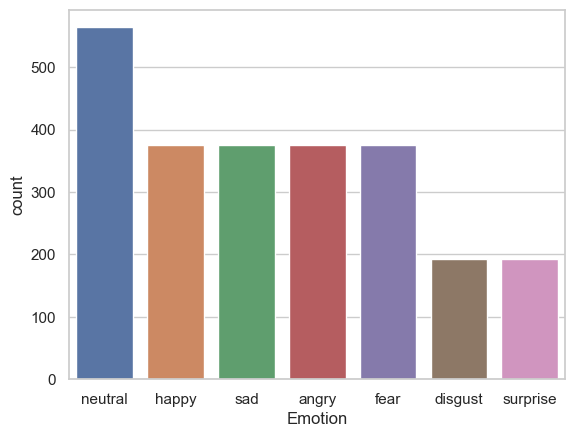

In [10]:
import seaborn as sns
sns.set_theme(style="whitegrid")

#df = sns.load_dataset("combined_df")
sns.countplot(data=Ravdess_df, x="Emotion")

In [11]:
def wave_plot(data,sr,emotion,color):
    plt.figure(figsize=(12,5))
    plt.title(f'Waveplot of {emotion} emotion',size=17)
    librosa.display.waveshow(y=data,sr=sr,color=color)

In [12]:
def spectogram(data,sr,emotion):
    audio=librosa.stft(data)
    audio_db=librosa.amplitude_to_db(abs(audio))
    plt.figure(figsize=(12,5))
    plt.title(f'Spectrogram of {emotion} emotion',size=17)
    librosa.display.specashow(audio_db,sr=sr,x_axis='time',y_axis='hz')
print("done")

done


In [13]:
colors={'disgust':'#804E2D','happy':'#F19C0E','sad':'#478FB8','neutral':'#4CB847','fear':'#7D55AA','angry':'#C00808','surprise':'#EE00FF'}

In [14]:
emotion_names=Ravdess_df['Emotion'].unique()
emotion_names

array(['neutral', 'happy', 'sad', 'angry', 'fear', 'disgust', 'surprise'],
      dtype=object)

In [15]:
# import numpy as np
# import librosa
# import librosa.display
# import matplotlib.pyplot as plt

# def spectrogram(data, sr, emotion):
#     plt.figure(figsize=(10, 4))
#     D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)
#     librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
#     plt.colorbar(format='%+2.0f dB')
#     plt.title(f'Spectrogram for {emotion}')
#     plt.tight_layout()
#     plt.show()

# # Assuming wave_plot function definition is available as well

# # Make sure the 'spectrogram' function is properly defined

# audio_path = []
# for emotion in emotion_names:
#     path = np.array(Ravdess_df['File_Path'][Ravdess_df['Emotion'] == emotion])[1]
#     data, sr = librosa.load(path)
#     wave_plot(data, sr, emotion, colors[emotion])
#     spectrogram(data, sr, emotion)
#     audio_path.append(path)


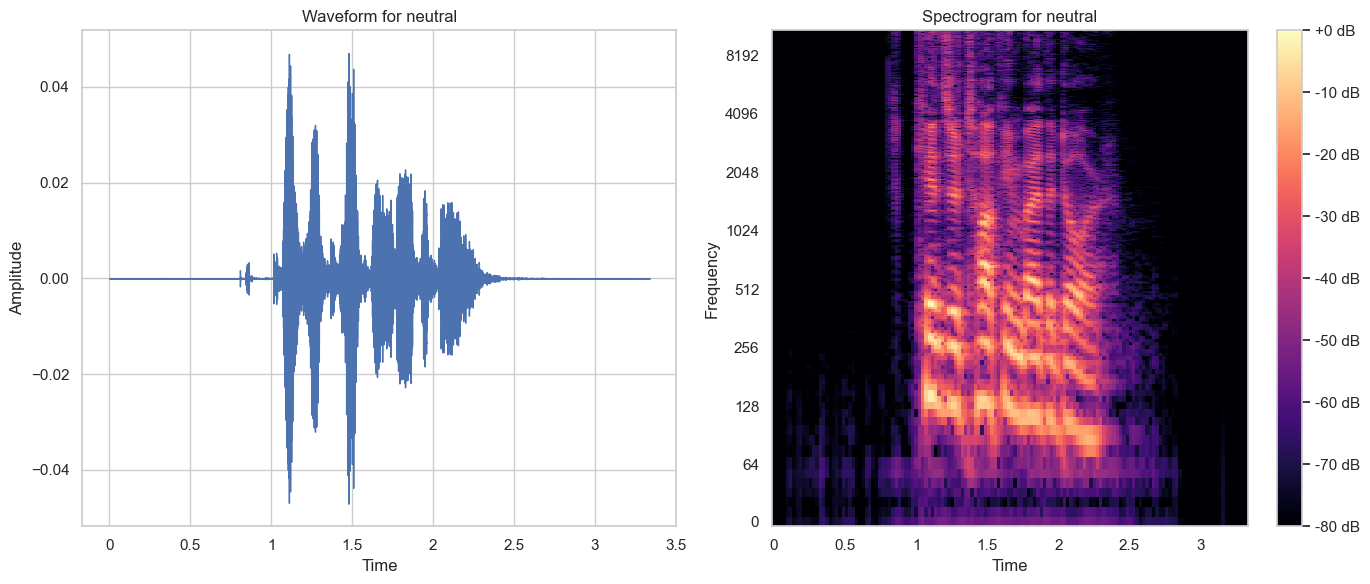

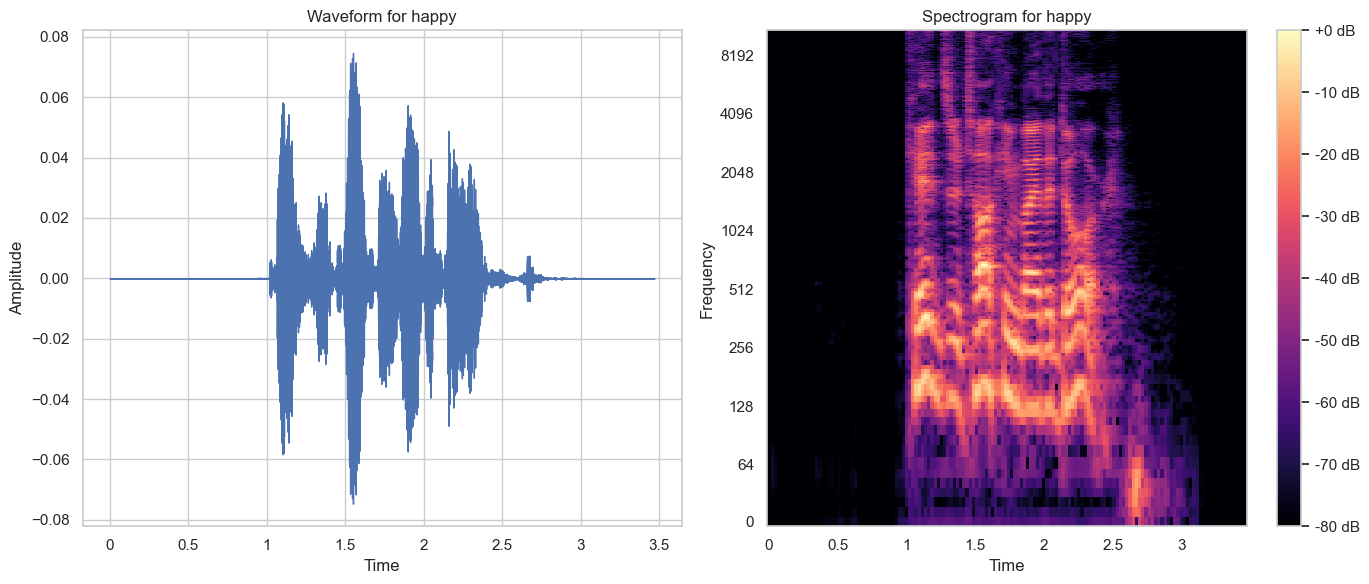

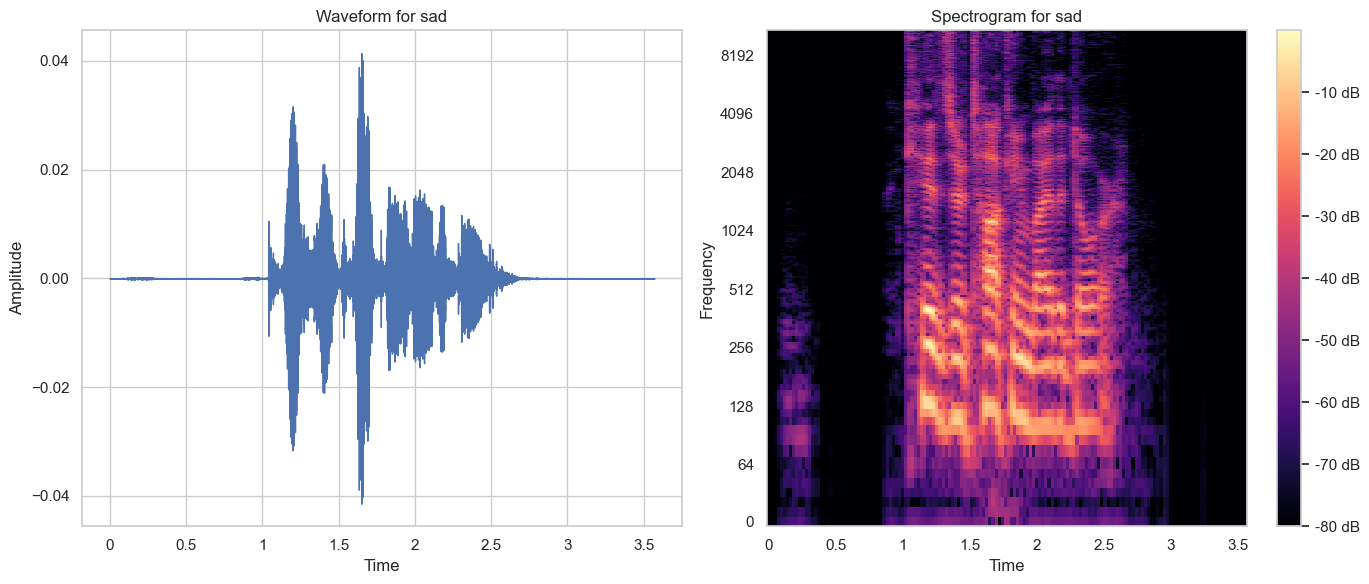

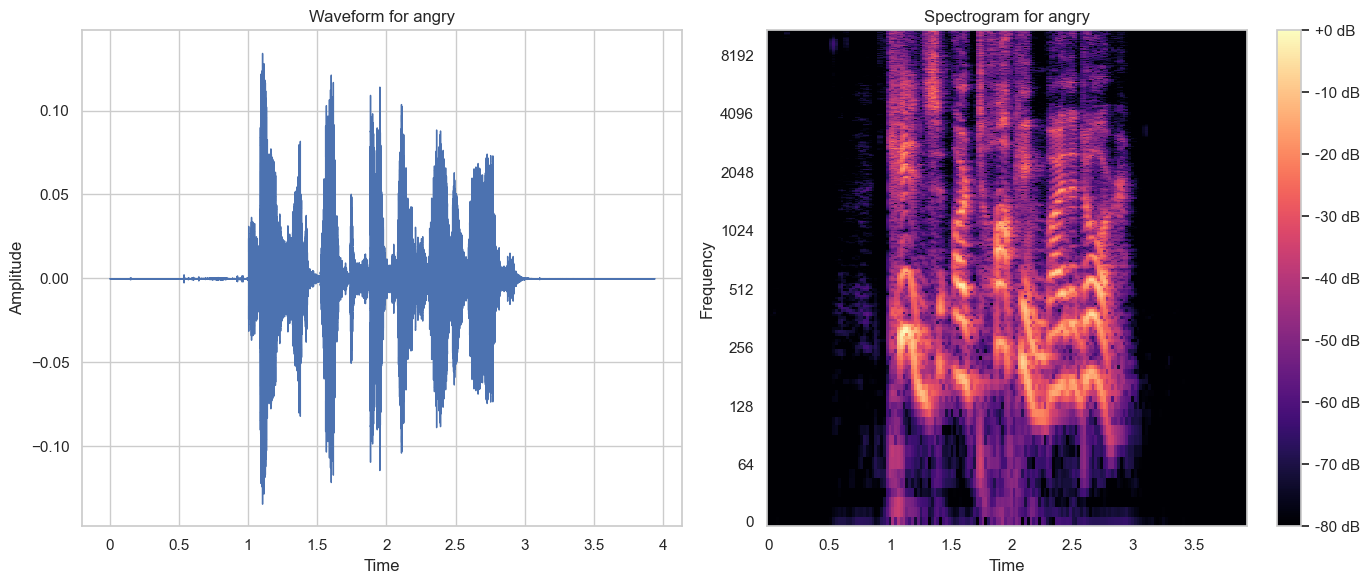

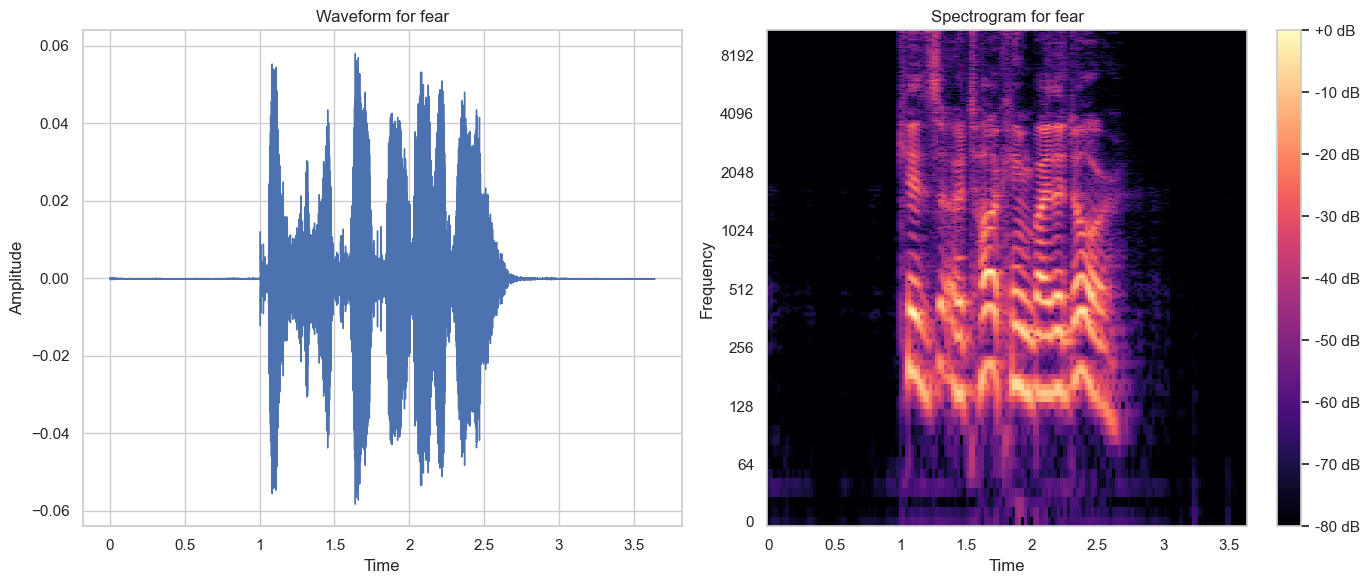

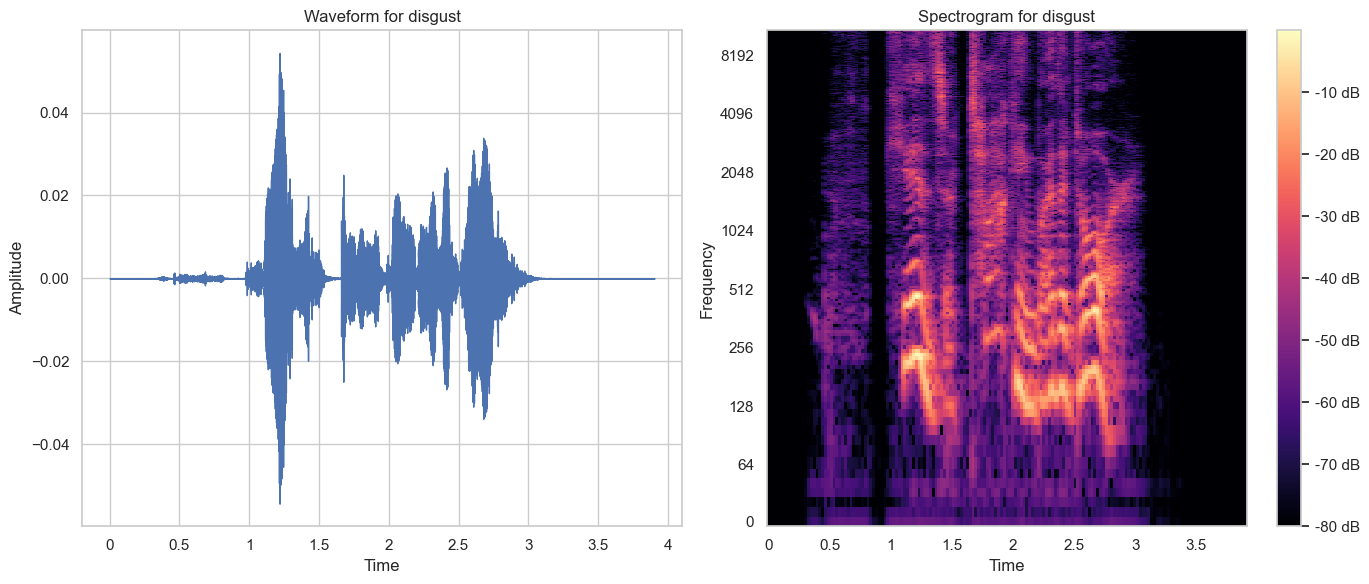

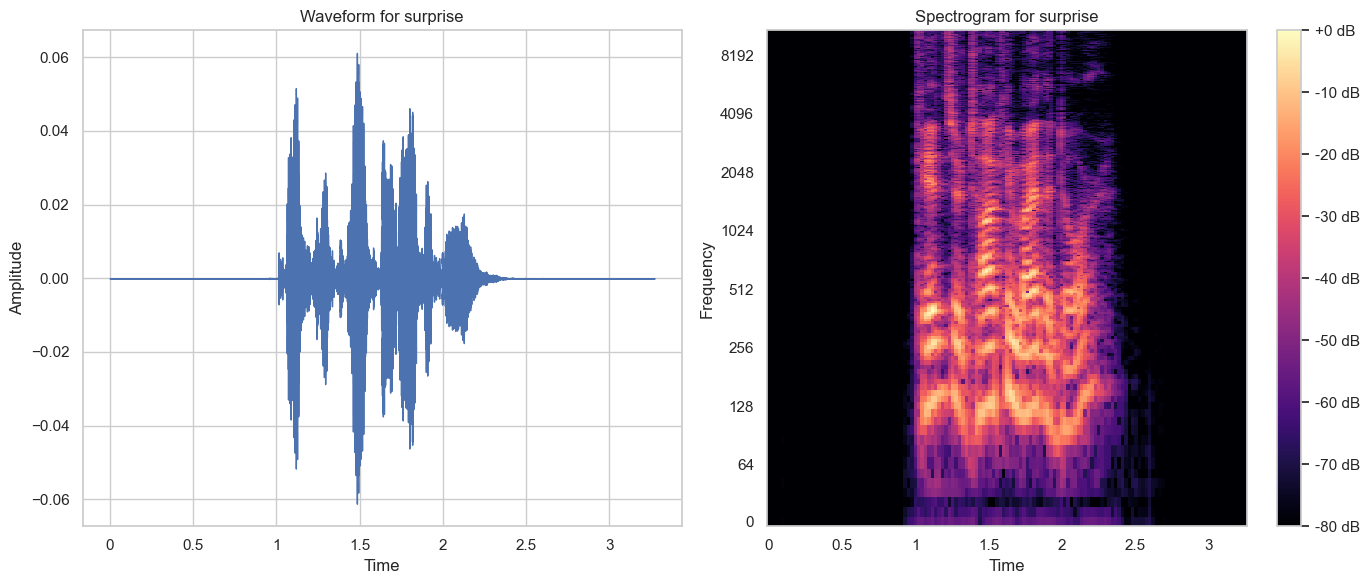

In [16]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

def plot_waveform_spectrogram(data, sr, emotion):
    plt.figure(figsize=(14, 6))

    # Plot Waveform
    plt.subplot(1, 2, 1)
    librosa.display.waveshow(data, sr=sr)
    plt.title(f'Waveform for {emotion}')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')

    # Plot Spectrogram
    plt.subplot(1, 2, 2)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Spectrogram for {emotion}')
    plt.xlabel('Time')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Assuming wave_plot function definition is available as well

# Make sure the 'plot_waveform_spectrogram' function is properly defined

audio_path = []
for emotion in emotion_names:
    path = np.array(Ravdess_df['File_Path'][Ravdess_df['Emotion'] == emotion])[1]
    data, sr = librosa.load(path)
    plot_waveform_spectrogram(data, sr, emotion)
    audio_path.append(path)


### Feature Extraction

In [17]:
def zcr(data,frame_length,hop_length):
    zcr=librosa.feature.zero_crossing_rate(y=data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(zcr)
def rmse(data,frame_length=2048,hop_length=512):
    rmse=librosa.feature.rms(y=data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(rmse)
def mfcc(data,sr,frame_length=2048,hop_length=512,flatten:bool=True):
    mfcc=librosa.feature.mfcc(y=data,sr=sr)
    return np.squeeze(mfcc.T)if not flatten else np.ravel(mfcc.T)

In [18]:
def extract_features(data,sr,frame_length=2048,hop_length=512):
    result=np.array([])
    
    result=np.hstack((result, zcr(data,frame_length,hop_length), rmse(data,frame_length,hop_length), mfcc(data,sr,frame_length,hop_length)))
    return result

In [19]:
def get_features(path,duration=2.5, offset=0.6):
    data,sr=librosa.load(path,duration=duration,offset=offset)
    aud=extract_features(data,sr)
    audio=np.array(aud)
    
    return audio

In [20]:
import numpy as np
import pandas as pd
import librosa

# Load your dataset into a pandas DataFrame
data_df1 = pd.read_csv('Ravdess_df.csv')  # Replace with the path to your dataset file

X = []  # Initialize the feature matrix
Y = []  # Initialize the emotion label vector

for index, row in data_df1.iterrows():
    file_path1 = row['File_Path']  
    emotion_label1 = row['Emotion']  
    
    # Extract features from the audio file
    features = get_features(file_path1)
    
    # Append the features to X and the label to Y
    X.append(features)
    Y.append(emotion_label1)


In [21]:
X

[array([0.00488281, 0.00683594, 0.0234375 , ..., 1.48098469, 1.32426548,
        1.169994  ]),
 array([0.01367188, 0.04589844, 0.06542969, ..., 0.        , 0.        ,
        0.        ]),
 array([0.00292969, 0.02148438, 0.02441406, ..., 0.        , 0.        ,
        0.        ]),
 array([0.00488281, 0.01953125, 0.02148438, ..., 1.86558366, 1.67810977,
        1.49356747]),
 array([ 0.01074219,  0.01269531,  0.01269531, ...,  3.83961153,
         1.24286556, -0.2991249 ]),
 array([0.01171875, 0.01855469, 0.04394531, ..., 0.08538315, 0.11866914,
        0.14108332]),
 array([0.01171875, 0.01660156, 0.02246094, ..., 1.87611556, 1.73465741,
        1.59248686]),
 array([0.015625  , 0.04101562, 0.06152344, ..., 2.85804939, 2.96901846,
        3.04855204]),
 array([0.00830078, 0.04003906, 0.06738281, ..., 0.92327631, 1.16817737,
        1.13748574]),
 array([ 2.92968750e-03,  1.56250000e-02,  1.56250000e-02, ...,
        -1.76639819e+00, -6.10425758e+00,  9.12900734e+00]),
 array([ 0.   

### Combining Features and Emotions

In [22]:
df = pd.DataFrame({'Emotions': Y, 'Features': X})
df

,Emotions,Features
0,neutral,"[0.0048828125, 0.0068359375, 0.0234375, 0.0224..."
1,neutral,"[0.013671875, 0.0458984375, 0.0654296875, 0.07..."
2,neutral,"[0.0029296875, 0.021484375, 0.0244140625, 0.02..."
3,neutral,"[0.0048828125, 0.01953125, 0.021484375, 0.0185..."
4,neutral,"[0.0107421875, 0.0126953125, 0.0126953125, 0.0..."
...,...,...
2447,fear,"[0.09765625, 0.13818359375, 0.18115234375, 0.1..."
2448,fear,"[0.10302734375, 0.17529296875, 0.2421875, 0.27..."
2449,fear,"[0.1201171875, 0.1826171875, 0.25927734375, 0...."
2450,fear,"[0.13134765625, 0.1962890625, 0.26220703125, 0..."


### Splitting Features

In [23]:
# Find the maximum length of any array in the 'array_column'
max_length = df['Features'].apply(lambda x: len(x)).max()

# Create new column names based on the maximum length
new_columns = [f'Feature_{i+1}' for i in range(max_length)]

# Split the arrays into different columns
for i in range(max_length):
    df[new_columns[i]] = df['Features'].apply(lambda x: x[i] if i < len(x) else None)
    
# Drop the original 'array_column' if you no longer need it
df.drop(columns=['Features'], inplace=True)

In [24]:
df

,Emotions,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_2367,Feature_2368,Feature_2369,Feature_2370,Feature_2371,Feature_2372,Feature_2373,Feature_2374,Feature_2375,Feature_2376
0,neutral,0.004883,0.006836,0.023438,0.022461,0.022461,0.058594,0.091797,0.126953,0.191895,...,2.533739,2.397799,2.254732,2.105907,1.952715,1.796568,1.638875,1.480985,1.324265,1.169994
1,neutral,0.013672,0.045898,0.065430,0.071289,0.062500,0.057617,0.081055,0.120117,0.154785,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,neutral,0.002930,0.021484,0.024414,0.029297,0.038086,0.054199,0.071289,0.083984,0.091309,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,neutral,0.004883,0.019531,0.021484,0.018555,0.020996,0.032227,0.038086,0.036133,0.035156,...,3.124088,2.961702,2.790755,2.612885,2.429749,2.243039,2.054423,1.865584,1.678110,1.493567
4,neutral,0.010742,0.012695,0.012695,0.012695,0.001953,0.015625,0.022461,0.038086,0.066406,...,1.397964,2.559003,2.909607,3.349390,3.576189,3.331364,4.323834,3.839612,1.242866,-0.299125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2447,fear,0.097656,0.138184,0.181152,0.169922,0.166016,0.162598,0.142090,0.125000,0.097168,...,-20.480537,-16.882263,-16.296076,5.166101,7.275044,-3.197114,12.145224,19.433945,11.197888,12.994379
2448,fear,0.103027,0.175293,0.242188,0.273926,0.300781,0.303223,0.301758,0.303223,0.295898,...,-27.874773,-18.507889,-19.284679,-4.555261,0.814260,-6.324391,11.852949,22.228333,14.920279,20.731407
2449,fear,0.120117,0.182617,0.259277,0.273438,0.282227,0.296875,0.291016,0.289062,0.292969,...,-18.896824,3.377070,-4.826099,-12.152618,-1.306639,-30.020784,-13.662174,0.164920,13.268404,28.144333
2450,fear,0.131348,0.196289,0.262207,0.255371,0.237305,0.226074,0.202148,0.184082,0.175781,...,-4.492706,5.625689,-34.187969,-19.902317,-1.180380,-32.303276,-9.294206,9.899233,26.704752,29.347874


In [25]:

# Names to count occurrences
names_to_count = ['neutral', 'happy', 'sad', 'angry', 'fear', 'disgust', 'surprise']

# Initialize a dictionary to store counts for each name
name_counts = {}

# Loop through the names and count occurrences in DataFrame columns
for name in names_to_count:
    count = (df == name).sum().sum()
    name_counts[name] = count

# 'name_counts' is a dictionary with counts for each name
print("Counts for each name:")
for name, count in name_counts.items():
    print(f"The name '{name}' appears {count} times in the DataFrame.")


Counts for each name:
The name 'neutral' appears 564 times in the DataFrame.
The name 'happy' appears 376 times in the DataFrame.
The name 'sad' appears 376 times in the DataFrame.
The name 'angry' appears 376 times in the DataFrame.
The name 'fear' appears 376 times in the DataFrame.
The name 'disgust' appears 192 times in the DataFrame.
The name 'surprise' appears 192 times in the DataFrame.


### Checking Nan Values and Removing

In [26]:
null_mask = df.isnull().any(axis=1)
null_rows = df[null_mask]

print(null_rows)

      Emotions  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
455       fear   0.054688   0.066895   0.093750   0.091309   0.115723   
470   surprise   0.038086   0.041992   0.067383   0.048340   0.029297   
884   surprise   0.001953   0.042969   0.074219   0.081055   0.081055   
1082      fear   0.000000   0.019531   0.055176   0.090820   0.136719   
1092  surprise   0.042969   0.052246   0.052246   0.030762   0.027832   
1095  surprise   0.079102   0.104004   0.119629   0.083496   0.052734   
1096  surprise   0.021973   0.048828   0.074219   0.053223   0.053223   
1098  surprise   0.034668   0.094727   0.159668   0.209961   0.272949   
1099  surprise   0.182617   0.262695   0.354004   0.359375   0.341309   
1250   neutral   0.075195   0.075195   0.089844   0.046387   0.017578   
1255   neutral   0.059570   0.103516   0.107422   0.062988   0.160156   
1258   neutral   0.000000   0.005859   0.005859   0.005859   0.027832   
1259   neutral   0.043457   0.046387   0.109863   0

In [27]:
df2=df.dropna(axis=1)

In [28]:
df2

,Emotions,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_2213,Feature_2214,Feature_2215,Feature_2216,Feature_2217,Feature_2218,Feature_2219,Feature_2220,Feature_2221,Feature_2222
0,neutral,0.004883,0.006836,0.023438,0.022461,0.022461,0.058594,0.091797,0.126953,0.191895,...,4.325215,3.834519,3.340515,2.863275,-854.507629,2.556789,2.546219,2.528664,2.504210,2.472997
1,neutral,0.013672,0.045898,0.065430,0.071289,0.062500,0.057617,0.081055,0.120117,0.154785,...,0.000000,0.000000,0.000000,0.000000,-859.693542,0.000000,0.000000,0.000000,0.000000,0.000000
2,neutral,0.002930,0.021484,0.024414,0.029297,0.038086,0.054199,0.071289,0.083984,0.091309,...,0.000000,0.000000,0.000000,0.000000,-858.044434,0.000000,0.000000,0.000000,0.000000,0.000000
3,neutral,0.004883,0.019531,0.021484,0.018555,0.020996,0.032227,0.038086,0.036133,0.035156,...,2.604749,2.278258,1.893247,1.333017,-840.390930,10.759708,10.372658,9.848251,9.259474,8.605227
4,neutral,0.010742,0.012695,0.012695,0.012695,0.001953,0.015625,0.022461,0.038086,0.066406,...,1.562334,2.171501,2.032845,1.135262,-874.216064,37.031910,25.355896,17.207075,13.609624,11.678013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2447,fear,0.097656,0.138184,0.181152,0.169922,0.166016,0.162598,0.142090,0.125000,0.097168,...,8.355169,5.695755,11.428436,37.911270,-390.098511,7.920562,-4.034001,21.171522,-14.955780,-6.508661
2448,fear,0.103027,0.175293,0.242188,0.273926,0.300781,0.303223,0.301758,0.303223,0.295898,...,-10.118071,-12.217543,7.759862,33.938675,-360.040771,25.039803,-20.313778,14.864700,-13.640261,-15.654750
2449,fear,0.120117,0.182617,0.259277,0.273438,0.282227,0.296875,0.291016,0.289062,0.292969,...,3.604109,21.559090,44.872288,39.785164,-351.213409,63.473511,-14.370535,-28.037457,-27.277784,-42.665974
2450,fear,0.131348,0.196289,0.262207,0.255371,0.237305,0.226074,0.202148,0.184082,0.175781,...,-6.222557,6.713016,33.521706,32.612350,-384.636902,77.792709,0.024076,-40.574875,-67.327873,-34.387989


In [29]:
null_mask = df2.isnull().any(axis=1)
null_rows = df2[null_mask]

print(null_rows)

Empty DataFrame
Columns: [Emotions, Feature_1, Feature_2, Feature_3, Feature_4, Feature_5, Feature_6, Feature_7, Feature_8, Feature_9, Feature_10, Feature_11, Feature_12, Feature_13, Feature_14, Feature_15, Feature_16, Feature_17, Feature_18, Feature_19, Feature_20, Feature_21, Feature_22, Feature_23, Feature_24, Feature_25, Feature_26, Feature_27, Feature_28, Feature_29, Feature_30, Feature_31, Feature_32, Feature_33, Feature_34, Feature_35, Feature_36, Feature_37, Feature_38, Feature_39, Feature_40, Feature_41, Feature_42, Feature_43, Feature_44, Feature_45, Feature_46, Feature_47, Feature_48, Feature_49, Feature_50, Feature_51, Feature_52, Feature_53, Feature_54, Feature_55, Feature_56, Feature_57, Feature_58, Feature_59, Feature_60, Feature_61, Feature_62, Feature_63, Feature_64, Feature_65, Feature_66, Feature_67, Feature_68, Feature_69, Feature_70, Feature_71, Feature_72, Feature_73, Feature_74, Feature_75, Feature_76, Feature_77, Feature_78, Feature_79, Feature_80, Feature_81, F

In [30]:
duplicate = df2[df2.duplicated()]
 
print("Duplicate Rows :")

Duplicate Rows :


### MinMax Scaling

In [31]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


# Column to exclude from scaling
column_to_exclude = 'Emotions'

# Create a copy of the DataFrame excluding the specified column
df_scaled = df2.drop(columns=[column_to_exclude]).copy()

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the DataFrame without the excluded column
scaled_data = scaler.fit_transform(df_scaled)

# Create a new DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=df_scaled.columns)

# Add the excluded column back to the scaled DataFrame
scaled_df[column_to_exclude] = df2[column_to_exclude]

# Display the original DataFrame and the Min-Max scaled DataFrame
print("Original DataFrame:")
print(df2)
print("\nScaled DataFrame (Min-Max scaled excluding the specified column):")
print(scaled_df)


Original DataFrame:
     Emotions  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
0     neutral   0.004883   0.006836   0.023438   0.022461   0.022461   
1     neutral   0.013672   0.045898   0.065430   0.071289   0.062500   
2     neutral   0.002930   0.021484   0.024414   0.029297   0.038086   
3     neutral   0.004883   0.019531   0.021484   0.018555   0.020996   
4     neutral   0.010742   0.012695   0.012695   0.012695   0.001953   
...       ...        ...        ...        ...        ...        ...   
2447     fear   0.097656   0.138184   0.181152   0.169922   0.166016   
2448     fear   0.103027   0.175293   0.242188   0.273926   0.300781   
2449     fear   0.120117   0.182617   0.259277   0.273438   0.282227   
2450     fear   0.131348   0.196289   0.262207   0.255371   0.237305   
2451     fear   0.159180   0.236328   0.320801   0.316895   0.296387   

      Feature_6  Feature_7  Feature_8  Feature_9  ...  Feature_2213  \
0      0.058594   0.091797   0.126953   0.19

### Splitting Dataset

In [32]:
X=scaled_df.drop(labels='Emotions',axis=1)
Y=scaled_df['Emotions']

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state=42,test_size=0.2,shuffle=True)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1961, 2222), (491, 2222), (1961,), (491,))

In [34]:
y_train

1436         sad
1815     disgust
2157       happy
2037     neutral
736      neutral
          ...   
1638       happy
1095    surprise
1130       angry
1294     disgust
860        angry
Name: Emotions, Length: 1961, dtype: object

In [35]:
y_test

2114      happy
700       happy
1165        sad
2416    neutral
1626    neutral
         ...   
1491      angry
192       angry
289         sad
174     neutral
907       happy
Name: Emotions, Length: 491, dtype: object

In [36]:
X_train

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_2213,Feature_2214,Feature_2215,Feature_2216,Feature_2217,Feature_2218,Feature_2219,Feature_2220,Feature_2221,Feature_2222
1436,0.660714,0.668275,0.667263,0.668444,0.626043,0.633936,0.612821,0.613518,0.641764,0.645191,...,0.264701,0.390906,0.912815,0.383689,0.390472,0.366026,0.689287,0.753267,0.491363,0.775755
1815,0.003571,0.002413,0.001789,0.001778,0.000000,0.000000,0.000000,0.000000,0.001800,0.001815,...,0.338169,0.254035,0.906496,0.281124,0.682699,0.326713,0.680794,0.660855,0.558781,0.814951
2157,0.328571,0.369119,0.400716,0.434667,0.449917,0.495263,0.483761,0.494801,0.499550,0.461887,...,0.305894,0.399331,0.921983,0.268326,0.329513,0.273195,0.692744,0.654511,0.683599,0.799773
2037,0.332143,0.299156,0.293381,0.262222,0.278798,0.291128,0.263248,0.194107,0.145815,0.119782,...,0.408692,0.409860,0.925810,0.353431,0.472707,0.918583,0.794864,0.514567,0.534808,0.526221
736,0.039286,0.050663,0.095707,0.118222,0.181970,0.211886,0.200855,0.206239,0.126013,0.083485,...,0.410958,0.463558,0.930480,0.339259,0.179598,0.481657,0.751206,0.664971,0.714804,0.822301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,0.489286,0.507841,0.502683,0.509333,0.472454,0.479759,0.451282,0.358752,0.323132,0.257713,...,0.310798,0.510040,0.955153,0.732625,0.539155,0.506011,0.521431,0.406535,0.337014,0.444384
1095,0.289286,0.256936,0.219141,0.152000,0.090150,0.067183,0.068376,0.075390,0.117912,0.151543,...,0.480258,0.511302,0.930904,0.375766,0.985327,0.201782,0.630805,0.585871,0.637214,0.781133
1130,0.000000,0.031363,0.073345,0.161778,0.287980,0.381568,0.447009,0.488735,0.478848,0.483666,...,0.201494,0.343038,0.903039,0.342482,0.575511,0.705151,0.600893,0.305211,0.528726,0.670782
1294,0.173214,0.266586,0.208408,0.144889,0.153589,0.051680,0.067521,0.107452,0.138614,0.161525,...,0.438100,0.454657,0.924529,0.334903,0.090253,0.223654,0.653239,0.615454,0.664260,0.811637


In [37]:
X_test

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_2213,Feature_2214,Feature_2215,Feature_2216,Feature_2217,Feature_2218,Feature_2219,Feature_2220,Feature_2221,Feature_2222
2114,0.407143,0.425814,0.425760,0.434667,0.403172,0.405685,0.405128,0.398614,0.404140,0.391107,...,0.170298,0.255875,0.909272,0.296215,0.668110,0.587078,0.523196,0.903581,0.726312,0.736321
700,0.225000,0.270205,0.288909,0.300444,0.267112,0.246339,0.159829,0.129116,0.092709,0.044465,...,0.269072,0.286871,0.917485,0.307321,0.674321,0.600125,0.297097,0.545517,0.577685,0.438482
1165,0.323214,0.317250,0.313953,0.327111,0.260434,0.254953,0.229915,0.190641,0.207021,0.193285,...,0.294616,0.352184,0.927141,0.347827,0.286043,0.470438,0.630401,0.550041,0.647977,0.761740
2416,0.487500,0.459590,0.454383,0.431111,0.367279,0.372954,0.333333,0.287695,0.256526,0.179673,...,0.531826,0.655752,0.923365,0.350723,0.555113,0.532952,0.490435,0.385093,0.419742,0.650257
1626,0.442857,0.441496,0.427549,0.424889,0.402337,0.400517,0.391453,0.360485,0.295230,0.232305,...,0.299760,0.252295,0.929576,0.568232,0.558931,0.342157,0.598446,0.787064,0.686098,0.413677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1491,0.075000,0.154403,0.128801,0.176000,0.259599,0.355728,0.436752,0.448007,0.433843,0.271325,...,0.438692,0.466365,0.926744,0.342288,0.408231,0.195442,0.623840,0.576033,0.628393,0.771715
192,0.219643,0.259349,0.299642,0.331556,0.333055,0.316968,0.302564,0.331023,0.363636,0.400181,...,0.273317,0.361851,0.915100,0.346230,0.694918,0.375033,0.499633,0.538872,0.515426,0.737341
289,0.203571,0.137515,0.101968,0.042667,0.005008,0.005168,0.005128,0.000000,0.000000,0.000000,...,0.358213,0.304287,0.923883,0.246125,0.589223,0.580472,0.499877,0.803164,0.702967,0.727502
174,0.289286,0.287093,0.296959,0.296889,0.297162,0.360896,0.468376,0.547660,0.568857,0.525408,...,0.311926,0.348789,0.949840,0.747884,0.523044,0.440042,0.488363,0.337162,0.327456,0.707135


## Training Dataset

### 1. Support Vector Machine

In [38]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [39]:
# Import necessary libraries
# import numpy as np
# from sklearn import datasets
# from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score



svm_classifier = SVC(kernel='linear', C=1.0)
svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6334012219959266


In [40]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the hyperparameter grid
param_grid = {
    'C': [0.1, 1,10],
    'kernel': ['poly', 'linear','rbf'],
    'gamma': ['auto'] + [0.001, 0.01, 0.1, 1], #scale
}

# Initialize the SVM classifier
base_model = SVC()

# Create a GridSearchCV object with cross-validation
grid_search = GridSearchCV(base_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV to your data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best estimator (model)
best_model = grid_search.best_estimator_

# Predict with the best model
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))


Best Hyperparameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Accuracy: 72.91%
Precision: 0.73
Recall: 0.73
F1 Score: 0.73


In [41]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Train an SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# Get a list of unique emotions in the dataset
unique_emotions = list(set(y_test))

# Create a dictionary to store accuracy for each emotion
emotion_accuracies = {}

for emotion in unique_emotions:
    # Make predictions on the testing set
    y_pred = best_model.predict(X_test)

    # Calculate accuracy for the current emotion
    emotion_indices = [i for i, e in enumerate(y_test) if e == emotion]
    true_positives = sum(1 for i in emotion_indices if y_pred[i] == emotion)
    false_negatives = len(emotion_indices) - true_positives

    accuracy = true_positives / (true_positives + false_negatives)
    
    # Store the accuracy in the dictionary
    emotion_accuracies[emotion] = accuracy

# Print accuracies for each emotion
for emotion, accuracy in emotion_accuracies.items():
    print(f'Accuracy for {emotion}: {accuracy:.2f}')


Accuracy for surprise: 0.57
Accuracy for sad: 0.67
Accuracy for fear: 0.73
Accuracy for disgust: 0.71
Accuracy for happy: 0.67
Accuracy for neutral: 0.82
Accuracy for angry: 0.81


In [42]:
confusion = confusion_matrix(y_test, y_pred)

# Printing the confusion matrix
print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[64  4  2  3  0  2  4]
 [ 3 25  2  0  1  3  1]
 [ 4  1 48  3  4  3  3]
 [ 5  2  7 51  7  1  3]
 [ 0  1  8  2 94  7  3]
 [ 1  0  4  4 15 52  2]
 [ 1  3  7  2  2  3 24]]


In [43]:
a,b=np.unique(y_pred,return_counts=True)
print (a)
print (b)

['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']
[ 78  36  78  65 123  71  40]


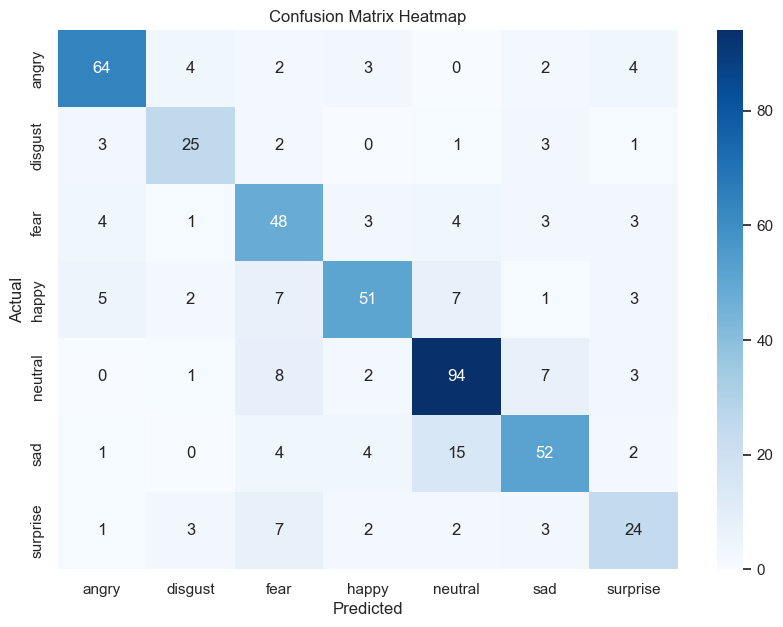

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Set the labels for the confusion matrix
labels = ['angry', 'disgust' ,'fear', 'happy', 'neutral' ,'sad' ,'surprise']
# Create a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Add labels and a title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')

plt.show()


### K - Nearest Neighbour

In [45]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create a KNN classifier (specify the number of neighbors, e.g., 3)
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Train the KNN classifier on the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.5437881873727087
Precision: 0.57
Recall: 0.54
F1 Score: 0.53


### Random Forest 

In [46]:
# Import necessary libraries
# from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.5458248472505092
Precision: 0.56
Recall: 0.55
F1 Score: 0.53


### Naive Bayes Classifier

In [47]:

from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

# Train the Naive Bayes classifier on the training data
naive_bayes_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = naive_bayes_classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))


Accuracy: 0.32179226069246436
Precision: 0.54
Recall: 0.32
F1 Score: 0.29


### Decision Tree Classifier

In [48]:

from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree classifier on the training data
decision_tree_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = decision_tree_classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.4093686354378819
Precision: 0.41
Recall: 0.41
F1 Score: 0.41


### MLP Classifier

In [49]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [50]:
from sklearn.neural_network import MLPClassifier

#Initialise Multi Layer Perceptron Classifier
model = MLPClassifier(alpha = 0.01, batch_size = 256, epsilon = 1e-08, hidden_layer_sizes = (300,), learning_rate = 'adaptive', max_iter = 500)
     
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 62.73%
Precision: 0.63
Recall: 0.63
F1 Score: 0.63


# Testing recorded data 

### creating dataframe

In [51]:
import pandas as pd
import os
import glob

# Directory containing the WAV files
test_path = 'Dataset/Test_Dataset'

# Get a list of WAV files in the directory
wav_files = glob.glob(os.path.join(test_path, '*.wav'))

# Initialize an empty list to store file paths and emotions
data = []

# Iterate through the WAV files
for file_path in wav_files:
    file_name = os.path.basename(file_path)  # Get the file name
    emotion = file_name.split('_')[-1].split('.')[0]  # Extract the emotion from the file name
    data.append({ 'Emotion': emotion, 'File_Path': file_path})

# Create a DataFrame from the collected data
test_df = pd.DataFrame(data)

# Display the DataFrame
print(test_df)


   Emotion                              File_Path
0    happy    Dataset/Test_Dataset\sara_happy.wav
1  neutral  Dataset/Test_Dataset\sara_neutral.wav


In [52]:
df = pd.DataFrame(test_df)

file_name = 'test_data.csv'

df.to_csv(file_name, index=False)

### Extracting Features

In [53]:
data_df2 = pd.read_csv('test_data.csv')  # Replace with the path to your dataset file

X1 = []  # Initialize the feature matrix
Y1 = []  # Initialize the emotion label vector

for index, row in data_df2.iterrows():
    file_path2 = row['File_Path']  # Assuming 'File_path1' is the column with audio file paths
    emotion_label2 = row['Emotion']  # Assuming 'Emotion' is the column with emotion labels
    
    # Extract features from the audio file
    features = get_features(file_path2)
    
    # Append the features to X and the label to Y
    X1.append(features)
    Y1.append(emotion_label2)

In [54]:
X1

[array([ 0.05712891,  0.078125  ,  0.09912109, ...,  0.9903053 ,
        -2.02973127,  2.46071434]),
 array([  0.03222656,   0.05712891,   0.08203125, ...,  -6.19661379,
         -3.43672371, -12.5972538 ])]

In [55]:
Y1

['happy', 'neutral']

### Combining Features and Emotions


In [56]:
df3 = pd.DataFrame({'Emotions': Y1, 'Features': X1})
df3

,Emotions,Features
0,happy,"[0.05712890625, 0.078125, 0.09912109375, 0.088..."
1,neutral,"[0.0322265625, 0.05712890625, 0.08203125, 0.11..."


In [57]:
# Find the maximum length of any array in the 'array_column'
max_length = df3['Features'].apply(lambda x: len(x)).max()

# Create new column names based on the maximum length
new_columns = [f'Feature_{i+1}' for i in range(max_length)]

# Split the arrays into different columns
for i in range(max_length):
    df3[new_columns[i]] = df3['Features'].apply(lambda x: x[i] if i < len(x) else None)
    
# Drop the original 'array_column' if you no longer need it
df3.drop(columns=['Features'], inplace=True)

In [58]:
df3

,Emotions,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_2367,Feature_2368,Feature_2369,Feature_2370,Feature_2371,Feature_2372,Feature_2373,Feature_2374,Feature_2375,Feature_2376
0,happy,0.057129,0.078125,0.099121,0.088379,0.084961,0.090332,0.094238,0.105469,0.102539,...,-4.299137,-2.829975,2.999141,8.824138,7.418369,-3.091035,1.612075,0.990305,-2.029731,2.460714
1,neutral,0.032227,0.057129,0.082031,0.111328,0.159668,0.212402,0.323242,0.395996,0.403809,...,-6.828599,-13.642521,-0.895009,2.896703,-9.041061,0.090317,-7.000358,-6.196614,-3.436724,-12.597254


In [59]:
df3['Feature_2223']

0    -6.453092
1   -48.336262
Name: Feature_2223, dtype: float64

### Checking NaN and Null values

In [60]:
null_mask = df3.isnull().any(axis=1)
null_rows = df3[null_mask]

print(null_rows)

Empty DataFrame
Columns: [Emotions, Feature_1, Feature_2, Feature_3, Feature_4, Feature_5, Feature_6, Feature_7, Feature_8, Feature_9, Feature_10, Feature_11, Feature_12, Feature_13, Feature_14, Feature_15, Feature_16, Feature_17, Feature_18, Feature_19, Feature_20, Feature_21, Feature_22, Feature_23, Feature_24, Feature_25, Feature_26, Feature_27, Feature_28, Feature_29, Feature_30, Feature_31, Feature_32, Feature_33, Feature_34, Feature_35, Feature_36, Feature_37, Feature_38, Feature_39, Feature_40, Feature_41, Feature_42, Feature_43, Feature_44, Feature_45, Feature_46, Feature_47, Feature_48, Feature_49, Feature_50, Feature_51, Feature_52, Feature_53, Feature_54, Feature_55, Feature_56, Feature_57, Feature_58, Feature_59, Feature_60, Feature_61, Feature_62, Feature_63, Feature_64, Feature_65, Feature_66, Feature_67, Feature_68, Feature_69, Feature_70, Feature_71, Feature_72, Feature_73, Feature_74, Feature_75, Feature_76, Feature_77, Feature_78, Feature_79, Feature_80, Feature_81, F

In [61]:
import pandas as pd

# Assume df is your DataFrame
# Find the index of 'Feature_2223' column
start_col_index = df3.columns.get_loc('Feature_2223')

# Remove columns from 'Feature_2223' to the last column
columns_to_remove = df3.columns[start_col_index:]

# Drop columns from 'Feature_2223' to the last column
df3 = df3.drop(columns=columns_to_remove, axis=1)

# Now df contains columns up to 'Feature_2222', excluding columns from 'Feature_2223' to the last column
print(df3)


  Emotions  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0    happy   0.057129   0.078125   0.099121   0.088379   0.084961   0.090332   
1  neutral   0.032227   0.057129   0.082031   0.111328   0.159668   0.212402   

   Feature_7  Feature_8  Feature_9  ...  Feature_2213  Feature_2214  \
0   0.094238   0.105469   0.102539  ...     -8.158518     -2.653066   
1   0.323242   0.395996   0.403809  ...      5.422617    -19.505695   

   Feature_2215  Feature_2216  Feature_2217  Feature_2218  Feature_2219  \
0      -6.25986     -6.310815   -618.352905     36.361511     28.642555   
1      -1.02990    -13.600679   -255.544266    145.685883    -21.281960   

   Feature_2220  Feature_2221  Feature_2222  
0     20.794819      5.751059     -3.076875  
1    -23.968109    -37.248383      5.741776  

[2 rows x 2223 columns]


In [62]:
null_mask = df3.isnull().any(axis=1)
null_rows = df3[null_mask]

print(null_rows)



Empty DataFrame
Columns: [Emotions, Feature_1, Feature_2, Feature_3, Feature_4, Feature_5, Feature_6, Feature_7, Feature_8, Feature_9, Feature_10, Feature_11, Feature_12, Feature_13, Feature_14, Feature_15, Feature_16, Feature_17, Feature_18, Feature_19, Feature_20, Feature_21, Feature_22, Feature_23, Feature_24, Feature_25, Feature_26, Feature_27, Feature_28, Feature_29, Feature_30, Feature_31, Feature_32, Feature_33, Feature_34, Feature_35, Feature_36, Feature_37, Feature_38, Feature_39, Feature_40, Feature_41, Feature_42, Feature_43, Feature_44, Feature_45, Feature_46, Feature_47, Feature_48, Feature_49, Feature_50, Feature_51, Feature_52, Feature_53, Feature_54, Feature_55, Feature_56, Feature_57, Feature_58, Feature_59, Feature_60, Feature_61, Feature_62, Feature_63, Feature_64, Feature_65, Feature_66, Feature_67, Feature_68, Feature_69, Feature_70, Feature_71, Feature_72, Feature_73, Feature_74, Feature_75, Feature_76, Feature_77, Feature_78, Feature_79, Feature_80, Feature_81, F

In [63]:
duplicate = df3[df3.duplicated()]
 
print("Duplicate Rows :")

Duplicate Rows :


### Splitting

In [64]:
# X1_test=scaled_df1.drop(labels='Emotions',axis=1)
# Y1_test=scaled_df1['Emotions']

In [65]:
X1_test=df3.drop(labels='Emotions',axis=1)
Y1_test=df3['Emotions']

In [66]:
X1_test

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_2213,Feature_2214,Feature_2215,Feature_2216,Feature_2217,Feature_2218,Feature_2219,Feature_2220,Feature_2221,Feature_2222
0,0.057129,0.078125,0.099121,0.088379,0.084961,0.090332,0.094238,0.105469,0.102539,0.113281,...,-8.158518,-2.653066,-6.25986,-6.310815,-618.352905,36.361511,28.642555,20.794819,5.751059,-3.076875
1,0.032227,0.057129,0.082031,0.111328,0.159668,0.212402,0.323242,0.395996,0.403809,0.379395,...,5.422617,-19.505695,-1.02990,-13.600679,-255.544266,145.685883,-21.281960,-23.968109,-37.248383,5.741776


In [67]:
Y1_test

0      happy
1    neutral
Name: Emotions, dtype: object

In [68]:
# Import necessary libraries
# import numpy as np
# from sklearn import datasets
# from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# Create an SVM classifier (SVC is for classification)
svm_classifier = SVC(kernel='linear', C=1.0)

# Train the SVM classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X1_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(Y1_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.5


In [69]:
confusion = confusion_matrix(Y1_test, y_pred)

# Printing the confusion matrix
print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[0 1]
 [0 1]]


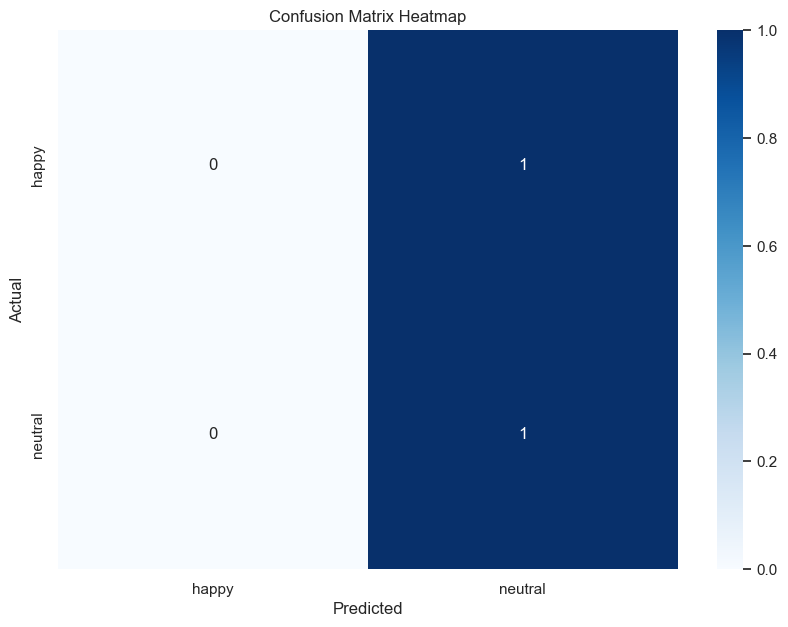

In [70]:
## import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you already have a confusion matrix (confusion)
# Replace this with your actual confusion matrix

# Set the labels for the confusion matrix
labels = ['happy', 'neutral']
# Create a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Add labels and a title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')

plt.show()
